In [1]:
import numpy as np
import tensorflow  as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import librosa
from google.colab import files
from google.colab import drive
import glob
import pickle
from statistics import mean

import warnings
warnings.filterwarnings('ignore')

In [0]:
drive.mount('/content/Drive/',force_remount =  True)
dirpath = "Drive/My Drive/timit-homework/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/Drive/


In [0]:
glob.glob('/content/*')

['/content/Drive', '/content/sample_data']

In [0]:
%pwd

'/content'

In [0]:
def file_op(file):
  #Loading train files
  
  s,sr=librosa.load(file, sr=None)
  S=librosa.stft(s, n_fft=1024, hop_length=512)
  
  #Taking absolute of input and output of training file
  S =  S.T
  S_abs = np.abs(S)
  
  #print(S_abs.shape)
  
  return s, S, S_abs


In [0]:
def load_files(filepath):
  
  at_list = []
  spec_list = []
  spec_abs_list = []
  
  print(dirpath+filepath)
  
  for file in sorted(glob.glob(dirpath+filepath)):
    #print(file)
    
    at, spec, spec_abs = file_op(file)

    at_list.append(at)
    spec_list.append(spec)
    spec_abs_list.append(spec_abs)

  sound_lists = {'at_list':at_list,
           'spec_list': spec_list,
           'spec_abs_list': spec_abs_list}
  
  return sound_lists

In [0]:
#Loading files
# train_sound_lists = load_files('tr/trx*')

In [0]:
#Loading clean and noise files
# train_clean_lists = load_files('tr/trs*')
# train_noise_lists = load_files('tr/trn*')


Drive/My Drive/timit-homework/tr/trs*
Drive/My Drive/timit-homework/tr/trn*


In [0]:
#Loading validations files
# val_sound_lists = load_files('v/vx*')
# val_clean_lists = load_files('v/vs*')
# val_noise_lists = load_files('v/vn*')

Drive/My Drive/timit-homework/v/vx*
Drive/My Drive/timit-homework/v/vs*
Drive/My Drive/timit-homework/v/vn*


In [0]:
#Loading test files
# test_sound_lists = load_files('te/tex*')

Drive/My Drive/timit-homework/te/tex*


In [0]:
#Loading files to pickle - Training
# sound_lists_pkl = open(dirpath+"train_sound_lists_pkl.pkl","wb")
# pickle.dump(train_sound_lists, sound_lists_pkl)
# sound_lists_pkl.close()

# clean_lists_pkl = open(dirpath+"train_clean_lists_pkl.pkl","wb")
# pickle.dump(train_clean_lists, clean_lists_pkl)
# clean_lists_pkl.close()

# noise_lists_pkl = open(dirpath+"train_noise_lists_pkl.pkl","wb")
# pickle.dump(train_noise_lists, noise_lists_pkl)
# noise_lists_pkl.close()



In [0]:
#Loading pickle to colab - Training
sound_lists_pkl_in = open(dirpath+"train_sound_lists_pkl.pkl", "rb")
train_sound_lists = pickle.load(sound_lists_pkl_in)

noise_lists_pkl_in = open(dirpath+"train_noise_lists_pkl.pkl", "rb")
train_noise_lists = pickle.load(noise_lists_pkl_in)

clean_lists_pkl_in = open(dirpath+"train_clean_lists_pkl.pkl", "rb")
train_clean_lists = pickle.load(clean_lists_pkl_in)

In [0]:
#Loading files to pickle - Validation
# sound_lists_pkl = open(dirpath+"val_sound_lists_pkl.pkl","wb")
# pickle.dump(val_sound_lists, sound_lists_pkl)
# sound_lists_pkl.close()

# clean_lists_pkl = open(dirpath+"val_clean_lists_pkl.pkl","wb")
# pickle.dump(val_clean_lists, clean_lists_pkl)
# clean_lists_pkl.close()

# noise_lists_pkl = open(dirpath+"val_noise_lists_pkl.pkl","wb")
# pickle.dump(val_noise_lists, noise_lists_pkl)
# noise_lists_pkl.close()

In [0]:
#Loading pickle to colab - Validation
sound_lists_pkl_in = open(dirpath+"val_sound_lists_pkl.pkl", "rb")
val_sound_lists = pickle.load(sound_lists_pkl_in)

noise_lists_pkl_in = open(dirpath+"val_clean_lists_pkl.pkl", "rb")
val_noise_lists = pickle.load(noise_lists_pkl_in)

clean_lists_pkl_in = open(dirpath+"val_noise_lists_pkl.pkl", "rb")
val_clean_lists = pickle.load(clean_lists_pkl_in)

In [0]:
#Loading files to pickle - Test
# sound_lists_pkl = open(dirpath+"test_sound_lists_pkl.pkl","wb")
# pickle.dump(test_sound_lists, sound_lists_pkl)
# sound_lists_pkl.close()

In [0]:
#Loading pickle to colab - Test
sound_lists_pkl_in = open(dirpath+"test_sound_lists_pkl.pkl", "rb")
test_sound_lists = pickle.load(sound_lists_pkl_in)

In [0]:
# #Loading pickle(K)
# sound_lists_pkl_in = open(dirpath+"dictOfTrainXFiles.pkl", "rb")
# sound_lists = pickle.load(sound_lists_pkl_in)

# noise_lists_pkl_in = open(dirpath+"dictOfTrainNFiles.pkl", "rb")
# noise_lists = pickle.load(noise_lists_pkl_in)

# clean_lists_pkl_in = open(dirpath+"dictOfTrainSFiles.pkl", "rb")
# clean_lists = pickle.load(clean_lists_pkl_in)


In [0]:
# M = 1*(noise_lists['spectrogram_MagList']<clean_lists['spectrogram_MagList'])
IBM=[]
for i in range(1200):
  m = 1*(train_noise_lists['spec_abs_list'][i]<train_clean_lists['spec_abs_list'][i])
  IBM.append(m)

In [0]:
#Parameters
batch_size = 10

n_outputs = 513

n_neurons = [512, 256, 512]

n_layers = 3

In [0]:
X = tf.placeholder(tf.float32, [None, None, 513])
y = tf.placeholder(tf.float32, [None, None, 513])

In [0]:
##RNN Architecture
lstm_cell1 = tf.keras.layers.LSTMCell(units=n_neurons[0])

lstm_cell2 = tf.keras.layers.LSTMCell(units=n_neurons[1])

lstm_cell3 = tf.keras.layers.LSTMCell(units=n_neurons[2])

multilayer_lstm = tf.keras.layers.StackedRNNCells([lstm_cell1, lstm_cell2])

rnn_outputs, rnn_states = tf.nn.dynamic_rnn(multilayer_lstm, X, dtype=tf.float32)

fc1 = fully_connected(rnn_outputs,1024)

fc1 = tf.nn.dropout(fc1, keep_prob=0.9)

output = tf.nn.sigmoid(fully_connected(fc1,n_outputs, activation_fn=None))


In [0]:
#Mean Square Error(MSE) - Defining the error calculated using output of the NN and the given output
mse = tf.losses.mean_squared_error(labels=y, predictions=output)
loss = tf.reduce_mean(mse, name="loss")

#Calculation of Rsquared, which is a measure of error for a regression problem
total_error = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y, output)))
R_squared = tf.subtract(1.0, tf.div(unexplained_error, total_error))

In [0]:
lr = 0.0005

#Using Adam Optimizer for minimizing the loss
optimizer = tf.train.AdamOptimizer(lr).minimize(mse)

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
#Training the RNN
n_epochs = 30
losses = []

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    epoch_loss = 0
    for iteration in range(len(train_sound_lists['spec_abs_list']) // batch_size):
      X_batch = train_sound_lists['spec_abs_list'][batch_size*iteration:batch_size*(iteration+1)]
      y_batch = IBM[batch_size*iteration:batch_size*(iteration+1)]
      sess.run(optimizer, feed_dict = {X: X_batch, y: y_batch})
      l = mse.eval(feed_dict={X: X_batch, y: y_batch})
      epoch_loss += l
    #acc_train = R_squared.eval(feed_dict={X: X_batch, y: y_batch})
    
    losses.append(epoch_loss)
    #acc_test = R_squared.eval(feed_dict={X2: mnist.test.images, y2:mnist.test.labels})
    print('Epoch:', epoch+1, "loss:", epoch_loss)
    #, "Test accuracy:", acc_test
    
  save_path = saver.save(sess, dirpath+"audio_model_rnn.ckpt") 

Epoch: 1 loss: 26.49275329709053
Epoch: 2 loss: 23.26344908773899
Epoch: 3 loss: 21.249259263277054
Epoch: 4 loss: 19.760746262967587
Epoch: 5 loss: 18.761248841881752
Epoch: 6 loss: 18.068112567067146
Epoch: 7 loss: 17.653731651604176
Epoch: 8 loss: 17.187046878039837
Epoch: 9 loss: 16.85738967359066
Epoch: 10 loss: 16.565571025013924
Epoch: 11 loss: 16.312717013061047
Epoch: 12 loss: 16.039692722260952
Epoch: 13 loss: 15.80054733902216
Epoch: 14 loss: 15.576575435698032
Epoch: 15 loss: 15.418730325996876
Epoch: 16 loss: 15.192585185170174
Epoch: 17 loss: 14.976099386811256
Epoch: 18 loss: 14.83229809999466
Epoch: 19 loss: 14.635369211435318
Epoch: 20 loss: 14.489706978201866
Epoch: 21 loss: 14.434301525354385
Epoch: 22 loss: 14.277378372848034
Epoch: 23 loss: 14.179723419249058
Epoch: 24 loss: 13.964422926306725
Epoch: 25 loss: 13.80157608538866
Epoch: 26 loss: 13.697206765413284
Epoch: 27 loss: 13.641492538154125
Epoch: 28 loss: 13.519776225090027
Epoch: 29 loss: 13.430482856929302


Text(0.5, 1.0, 'LSTM')

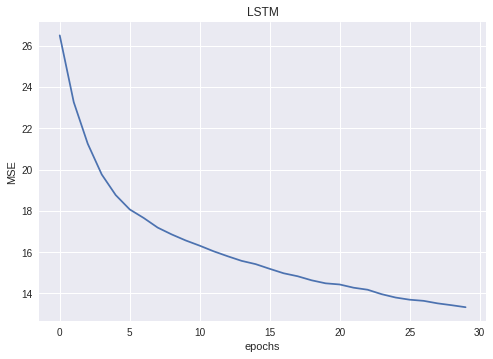

In [0]:
#plotting losses vs epochs
eps = np.arange(0,n_epochs)
plt.plot(eps, losses)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('LSTM')

In [0]:
#Function to recover clean audio from input in  time domain after running through the trained NN
def speech_recovery(s_data):
  X1 = s_data
  X_abs = np.abs(X1)
  
  with tf.Session() as sess:
    #init.run()
    saver.restore(sess, dirpath+"audio_model_rnn.ckpt")
    X_abs = np.reshape(X_abs, (1,X_abs.shape[0],X_abs.shape[1]))
    ff = output.eval(feed_dict = {X: X_abs})
    #Hadamard product to construct clean test signal
    sbar = ff[0]*X1
    
    #inverse stft to bring the signal to time domain
    s = librosa.core.istft(sbar.T, hop_length=512)
    
  return s 

In [0]:
#Function for calculating SNR
def snr_cal(at_clean_file, spec_sound_file):
  
  s = speech_recovery(spec_sound_file)
  
  min_len = min(len(at_clean_file),len(s))
  pred_clipped = s[:min_len]
  true_clipped = at_clean_file[:min_len]
  
  signal = np.dot(true_clipped,true_clipped.T)
  subtract = true_clipped - pred_clipped
  noise = np.dot(subtract,subtract.T)
  
  snr = 10*np.log10(signal/noise)
  #print('Signal to Noise Ratio for input file:',snr)
  return snr

  

In [0]:
snr_cal(val_clean_lists['at_list'][2], val_sound_lists['spec_list'][2])

INFO:tensorflow:Restoring parameters from Drive/My Drive/timit-homework/audio_model_rnn.ckpt


-3.6079564690589905

In [0]:
#Outputting the first validations file
val1_ff = speech_recovery(val_sound_lists['spec_list'][0])
librosa.output.write_wav('test_s_01_recons.wav', val1_ff, 16000)
files.download('test_s_01_recons.wav')


In [0]:
snr_vals = []
for i in range(1200):
  snr = snr_cal(val_clean_lists['at_list'][i], val_sound_lists['spec_list'][i])
  #print(snr)
  snr_vals.append(snr)
  
#print('Average SNR:',mean(snr_vals))

In [0]:
#Storing the feed forward Test files
for i in range(len(test_sound_lists['at_list'])):
  test_ff = speech_recovery(test_sound_lists['spec_list'][i])
  op_file_name = 'test-ff/test_s_'+str(i)+'_recons.wav'
  librosa.output.write_wav(dirpath+op_file_name, test_ff, 16000)

In [0]:
# test_ff = speech_recovery(val_sound_lists['spec_list'][0])
# op_file_name = 'test-ff/test_s_'+str(0)+'_recons.wav'
# librosa.output.write_wav(dirpath+op_file_name, val1_ff, 16000)
